<a href="https://colab.research.google.com/github/NemesisCrociata/Production-of-Product-Sales/blob/main/Preparing_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales - Preparing for Machine Learning
  - Nemesis Crociata

## Project Overview
- An overview of products and outlets for our client, a major grocer retailer, that play crucial roles in increasing sales.

## Load and Inspect Data

In [48]:
# Importing necessary libraries and modules

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(transform_output='pandas')

In [8]:
# The data is stored as the variable 'file'.
file = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

# The csv file is read and stored as a Pandas DataFrame.
df = pd.read_csv(file)

### Brief overview

In [9]:
# First 5 columns
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Last 5 columns
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [11]:
# Summary of the DataFrame, including columns and rows count, non-null counts,
# and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Dictionary

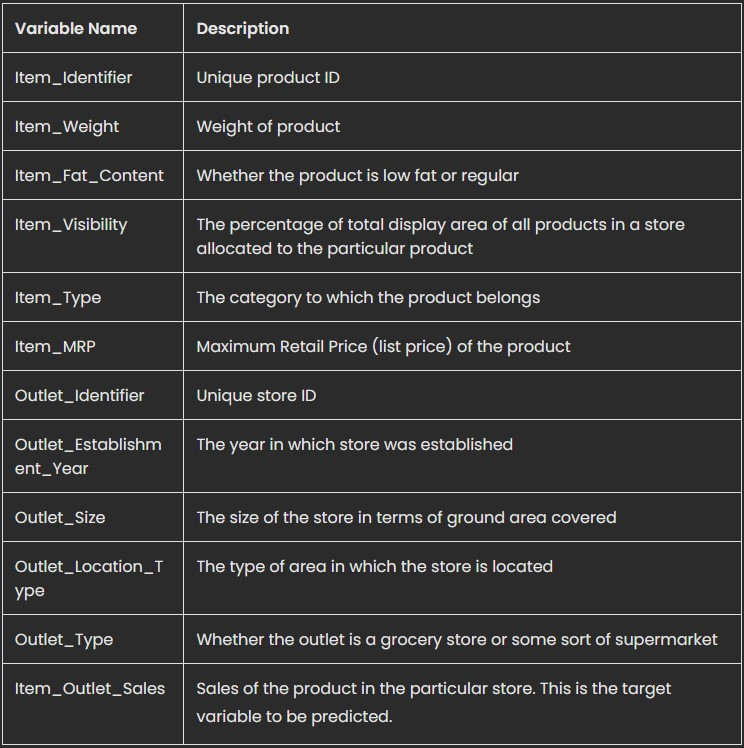

## Clean Data

- To start, some columns are renamed for clarity.

In [13]:
# A dictionary is created with new column names

rename_dict = {'Item_Identifier': 'Item_ID',
               'Item_MRP': 'Maximum_Retail_Price',
               'Outlet_Location_Type': 'Location_Type'}

# Columns in the DataFrame are renamed using the dictionary

df.rename(rename_dict, axis=1, inplace=True)
df.head()

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
# Unique values are shown for each feature

unique_vals = df.nunique()
unique_vals

Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Maximum_Retail_Price         5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Location_Type                   3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [44]:
# The percentage of unique values are calculated
unique_vals / len(df) * 100

Item_Weight                   4.869178
Item_Fat_Content              0.023466
Item_Visibility              92.455708
Maximum_Retail_Price         69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Location_Type                 0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

**Since there are no columns with 100% unique values, no columns are removed.**


In [45]:
# The total number of duplicate rows are shown
df.duplicated().sum()

0

**Since there are no duplicated rows in the data set, no rows are removed.**

In [18]:
# The data types of each feature are shown
df.dtypes

Item_ID                       object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Maximum_Retail_Price         float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Location_Type                 object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**No column data types need to be adjusted.**

In [19]:
# Value counts are shown for each feature

for col in df.columns:
  print(f'Value Counts for {col}:')
  print(df[col].value_counts ())
  print('\n')

Value Counts for Item_ID:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_ID, Length: 1559, dtype: int64


Value Counts for Item_Weight:
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Visibility:
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy         

- **Due to high cardinality (value counts >10), columns 'Item_Identifier' and 'Item_Type' will be dropped.**

In [22]:
# Features are dropped using .drop()

df.drop(columns=['Item_ID', 'Item_Type'], inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- We can see there are values in 'Item_Fat_Content' that can be renamed and merged.

In [20]:
# Inconsistent categories are replaced using .replace()

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Object values are now consistent.**

In [21]:
# The total null values are shown
df.isna().sum()

Item_ID                         0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Maximum_Retail_Price            0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Location_Type                   0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**There are some null values in 'Item_Weight' and 'Outlet_Size'. These will be addressed later.**

## Preparing the Data for Machine Learning

### Splitting the data

In [25]:
# The target vector is stored in y
y = df['Item_Outlet_Sales']

# The features matrix is stored in X as a copy
X = df.drop(columns='Item_Outlet_Sales').copy()

# The dataset is split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Creating pathways for the ColumnTransformer

In [26]:
# Number-type features are stored
num_cols = X_train.select_dtypes('number').columns

# An instance of SimpleImputer is created
# This will fill null values with the median
num_imputer = SimpleImputer(strategy='median')

# An instance of StandardScaler is created
num_scaler = StandardScaler()

# A pipeline is created to process number-type features
num_pipe = make_pipeline(num_imputer, num_scaler)

# A tuple is created for the ColumnTransformer
num_tuple= ('numeric', num_pipe, num_cols)

In [36]:
# The process is repeated for ordinal-type features

ord_cols = ['Outlet_Size', 'Location_Type', 'Outlet_Type']

# The strategy and fill_value arguments are adjusted
impute_ord = SimpleImputer(strategy='constant', fill_value='NA')

# Lists are created for each ordinal feature
size_order = ['NA', 'Small', 'Medium', 'High']
tier_order = ['Tier 1', 'Tier 2', 'Tier 3']
type_order = ['Grocery Store', 'Supermarket Type1',
              'Supermarket Type2', 'Supermarket Type3']

# Each list is stored in another list
ordinal_category_orders = [size_order, tier_order, type_order]

# An instance of OrdinalEncoder is created using the stored list
# This will transform the values stored into numerical values
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)

ord_scaler = StandardScaler()

ord_pipe = make_pipeline(impute_ord, ord_encoder, ord_scaler)

ord_tuple = ('ordinal', ord_pipe, ord_cols)

In [31]:
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

# An instance of OneHotEncoder is created
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# A pipeline is not created because it is not needed
# In its place, the instance of OneHotEncoder is passed as an argument
cat_tuple = ('nominal', ohe_encoder, cat_cols)

### Creating the ColumnTransformer

In [39]:
# An instance of ColumnTransformer uses the tuples created
col_transformer = ColumnTransformer([num_tuple, ord_tuple, cat_tuple],
                                    verbose_feature_names_out=False)

# The ColumnTransformer is fit to the training set
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Maximum_Retail_Price',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')...
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Location_Type',
                                  'Outlet_Type']),
                                ('nominal',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Outlet_Identifier'], dtype='object'))],
                  verbose_feature_names_out=False)

In [40]:
# The training and testing sets are transformed
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)

# The new training set is previewed
X_train_tf.head()

,Item_Weight,Item_Visibility,Maximum_Retail_Price,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.084948,0.983572,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,1.084948,0.983572,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,-1.384777,-0.263600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Previewing the processed datasets

In [49]:
# The new values are shown
# They have been successfully scaled
X_train_tf.describe().round(2)

,Item_Weight,Item_Visibility,Maximum_Retail_Price,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.65,0.35,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31
min,-1.97,-1.29,-1.77,-1.53,-1.28,-1.38,-1.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,-1.29,-1.28,-1.38,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.05,-0.23,0.03,0.14,-0.26,-0.15,-0.26,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.77,0.56,0.72,0.73,0.75,1.08,-0.26,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2.01,5.13,1.99,1.33,1.76,1.08,2.23,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [42]:
# All null values have been successfully filled
X_train_tf.isna().sum().sum()

0